In [0]:
from keras.models import *
from keras.layers import *
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from numpy import dot
from numpy.linalg import norm
from os import listdir
from os.path import isfile, join

In [0]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
!gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo&

In [0]:
model.load_weights('vgg_face_weights.h5')

In [13]:
!unzip "/content/aligned_mahdi_hamed.zip"

Archive:  /content/aligned_mahdi_hamed.zip
   creating: aligned_mahdi_hamed/
  inflating: aligned_mahdi_hamed/hamed (1).jpg  
  inflating: aligned_mahdi_hamed/hamed (2).jpg  
  inflating: aligned_mahdi_hamed/hamed (3).jpg  
  inflating: aligned_mahdi_hamed/hamed (4).jpg  
  inflating: aligned_mahdi_hamed/hamed (5).jpg  
  inflating: aligned_mahdi_hamed/hamed (6).jpg  
  inflating: aligned_mahdi_hamed/hamed (7).jpg  
  inflating: aligned_mahdi_hamed/mahdi (1).jpg  
  inflating: aligned_mahdi_hamed/mahdi (2).jpg  
  inflating: aligned_mahdi_hamed/mahdi (3).jpg  
  inflating: aligned_mahdi_hamed/mahdi (4).jpg  
  inflating: aligned_mahdi_hamed/mahdi (5).jpg  
  inflating: aligned_mahdi_hamed/mahdi (6).jpg  
  inflating: aligned_mahdi_hamed/mahdi (7).jpg  


In [0]:
vgg_face_descriptor = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)

In [0]:
def describe_face_image(filename):
  path = "/content/aligned_mahdi_hamed/" + filename + ".jpg"
  img = cv2.imread(path)
  img = cv2.resize(img, (224, 224))
  # cv2_imshow(img)
  img = np.expand_dims(img, axis=0)
  description = vgg_face_descriptor.predict(img)
  description = description[0]
  return description

In [0]:
def similarity(a, b):
  return dot(a, b)/(norm(a) * norm(b))

In [39]:
mypath = "/content/aligned_mahdi_hamed/"
images = [f for f in listdir(mypath) if isfile(join(mypath, f))]
images

['mahdi (6).jpg',
 'mahdi (4).jpg',
 'mahdi (5).jpg',
 'hamed (4).jpg',
 'hamed (6).jpg',
 'hamed (7).jpg',
 'hamed (2).jpg',
 'mahdi (1).jpg',
 'hamed (1).jpg',
 'mahdi (2).jpg',
 'mahdi (7).jpg',
 'hamed (5).jpg',
 'mahdi (3).jpg',
 'hamed (3).jpg']

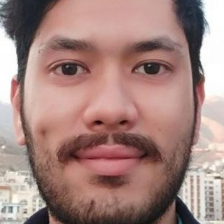

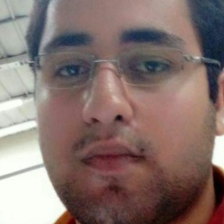

In [29]:
mahdi1 = describe_face_image("mahdi (1)")
hamed1 = describe_face_image("hamed (1)")

In [52]:
mahdi_sim = []
hamed_sim = []
hameds = []
mahdis = []
for img in images:
  img = img[:-4]
  desc = describe_face_image(img)
  mahdi1_sim = similarity(mahdi1, desc)
  hamed1_sim = similarity(hamed1, desc)
  if mahdi1_sim > hamed1_sim :
    
    mahdis.append(img)
  elif hamed1_sim > mahdi1_sim:
    hameds.append(img)
      
  # print('similarity of ' + img + ' and mahdi1 = ' + str(mahdi1_sim))# mahdi ha 85
  # print('similarity of ' + img + ' and hamed1 = ' + str(hamed1_sim))# hamed ha 75
  
print('hameds: ' + str(hameds))
print()
print('mahdis: ' + str(mahdis))
print()
print('Done!')

hameds: ['hamed (4)', 'hamed (6)', 'hamed (7)', 'hamed (2)', 'hamed (1)', 'hamed (5)', 'hamed (3)']

mahdis: ['mahdi (6)', 'mahdi (4)', 'mahdi (5)', 'mahdi (1)', 'mahdi (2)', 'mahdi (7)', 'mahdi (3)']

Done!


# New Section